In [2164]:
#historical S&P price data

import numpy as np
import pandas as pd
import yfinance as yf

SPY = yf.download('SPY', start = '1999-07-01')

SPY.to_csv('spy.csv', index = False)

[*********************100%***********************]  1 of 1 completed


In [2165]:
SPY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6084.000000,6084.000000,6084.000000,6084.000000,6084.000000,6.084000e+03
mean,192.725644,193.888988,191.454954,192.735468,165.148469,1.063494e+08
std,101.631026,102.162223,101.064049,101.661115,109.903446,9.291832e+07
min,67.949997,70.000000,67.099998,68.110001,51.568027,1.436600e+06
25%,119.484999,120.239998,118.777498,119.480003,85.645832,4.908060e+07
50%,143.984375,144.846878,142.995003,143.843750,107.667450,7.954070e+07
75%,245.500000,247.014999,244.329998,246.082497,222.715076,1.374171e+08
max,479.220001,479.980011,476.059998,477.709991,466.563324,8.710263e+08


In [2166]:
#checking for missing data
SPY.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [2167]:
#converting the index to datetime

SPY.index = pd.to_datetime(SPY.index)


In [2168]:
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-07-01,137.000000,138.500000,136.062500,138.031250,89.306557,9939500
1999-07-02,138.125000,139.500000,137.906250,139.406250,90.196167,3772800
1999-07-06,139.250000,140.750000,138.593750,139.375000,90.175934,11221100
1999-07-07,139.062500,139.718750,138.515625,139.562500,90.297272,3230700
1999-07-08,139.062500,140.625000,138.750000,139.671875,90.368050,7101500
...,...,...,...,...,...,...
2023-08-29,442.649994,449.450012,442.459991,449.160004,449.160004,83081900
2023-08-30,449.510010,451.670013,448.779999,451.010010,451.010010,69053900
2023-08-31,451.649994,452.829987,450.160004,450.350006,450.350006,66084600


In [2169]:
#looking at the standard deviation as a volatility metric

# Daily return
SPY['Daily_return'] = SPY['Close'].pct_change()*100

# Volatility
volatility = SPY['Daily_return'].std()
annual_volatility = volatility * (252 ** 0.5)

# Printing daily and yearly volatility
print(volatility * 100, annual_volatility * 100)



124.00769648573376 1968.5611533553797


In [2170]:
#calculating volatility using ATR

high_low = (SPY['High']-SPY['Low'])
high_close = SPY['High']-SPY['Close'].shift(1)
low_close = SPY['Close'].shift(1)-SPY['Low']

drop_first = high_low.index[0]
high_low.drop(drop_first, inplace = True)
high_close.dropna(axis =0, inplace = True)
low_close.dropna(axis = 0, inplace = True)

true_range_df = true_range_df = pd.concat([high_low, high_close, low_close], axis=1)
true_range = true_range_df.max(axis = 1)

true_range = true_range/SPY['Close'].shift(1)*100
daily = true_range.mean()
yearly = daily*(252**0.5)
print(daily, yearly)

1.4634716794137619 23.231892687089154


In [2171]:

import matplotlib.pyplot as plt

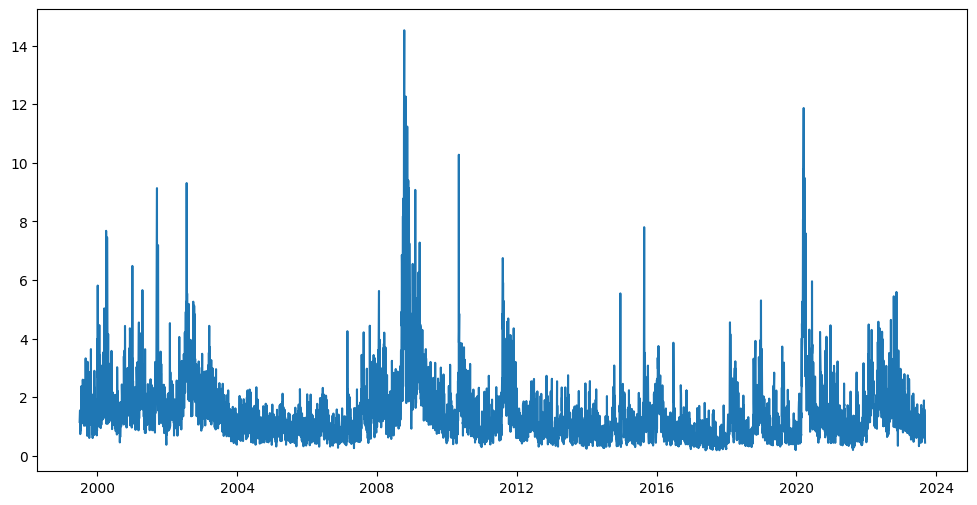

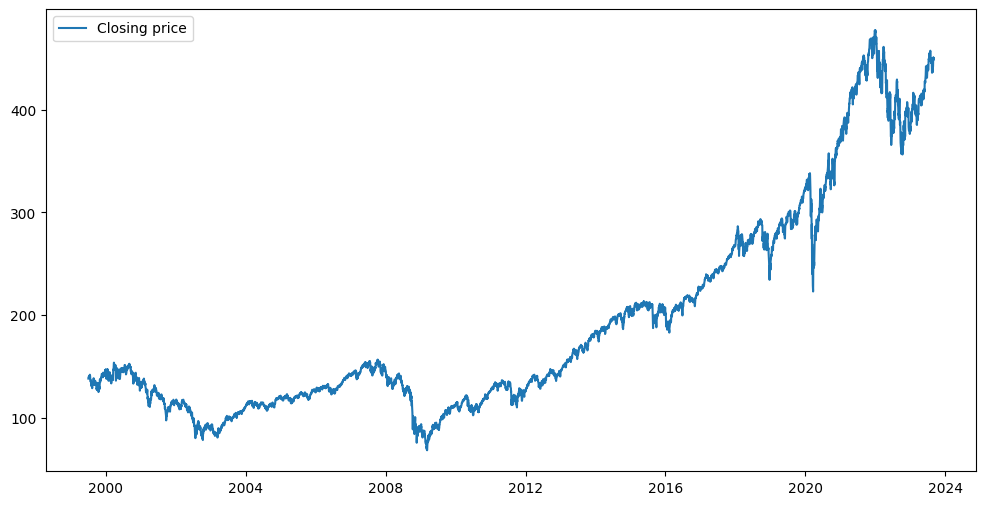

In [2172]:
plt.figure(figsize=(12, 6))
plt.plot(true_range.index, true_range, label = 'Vol')
plt.show() 
plt.figure(figsize=(12, 6))
plt.plot(SPY.index, SPY['Close'], label = 'Closing price')
plt.legend()
plt.show() 

In [2173]:
true_range.describe()

count    6083.000000
mean        1.463472
std         1.112128
min         0.186134
25%         0.769294
50%         1.178689
75%         1.812775
max        14.519772
dtype: float64

In [2174]:
true_range.dropna(inplace = True)

In [2175]:
import scipy.stats as stats

skewness = stats.skew(true_range)
skewness

3.2415820129629402

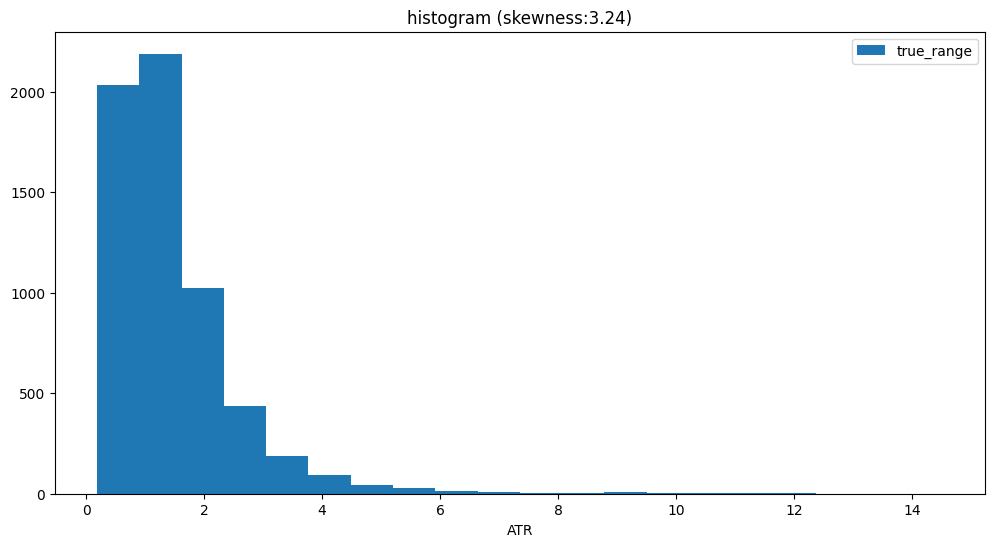

In [2176]:
#right skewed distribution
plt.figure(figsize = (12, 6))
plt.hist(true_range, bins = 20, label = 'true_range')
plt.title(f'histogram (skewness:{skewness:.2f})')
plt.xlabel('ATR')
plt.legend() 
plt.show()

In [2182]:
print(SPY['rolling_vol'].mean())
print(SPY['rolling_vol'].median())

1.0619035630885223
0.8971641094847013


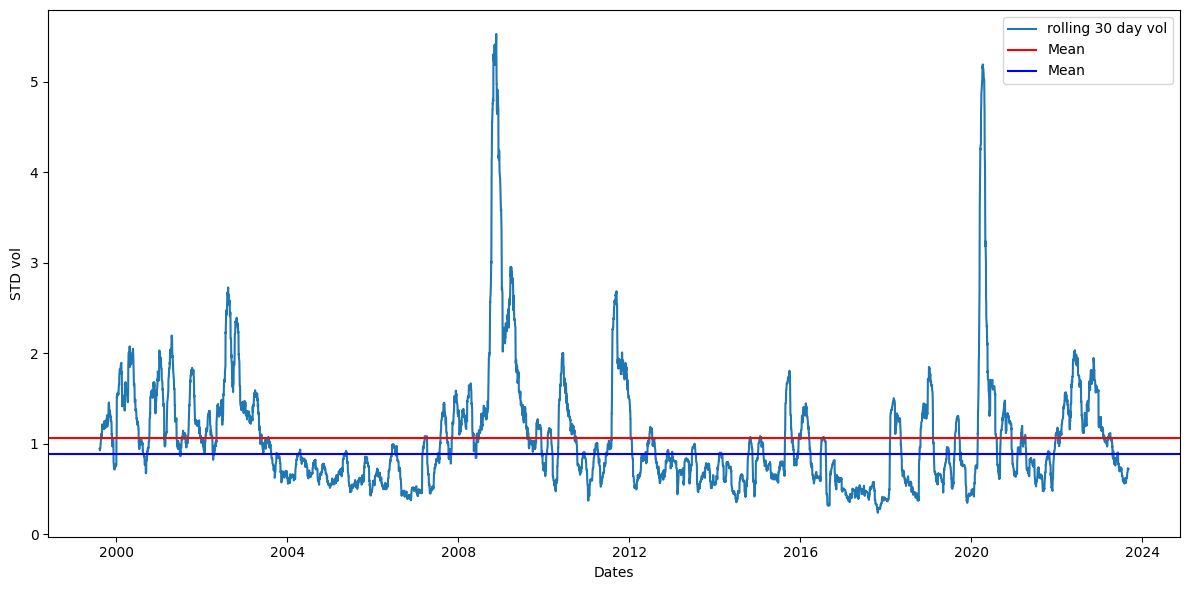

In [2183]:
#calculating rolling volatility
SPY['rolling_vol'] = SPY['Daily_return'].rolling(30).std()
plt.figure(figsize = (12, 6))
plt.plot(SPY.index, SPY['rolling_vol'], label = 'rolling 30 day vol')
plt.xlabel('Dates')
plt.ylabel('STD vol')
plt.axhline(y = 1.06, label = 'Mean', color = 'red')
plt.axhline(y = 0.89, label = 'Mean', color = 'blue')
plt.legend()
plt.tight_layout()
plt.show()

In [2184]:
SPY

,Open,High,Low,Close,Adj Close,Volume,Daily_return,rolling_vol
Date,,,,,,,,
1999-07-01,137.000000,138.500000,136.062500,138.031250,89.306557,9939500,NaN,NaN
1999-07-02,138.125000,139.500000,137.906250,139.406250,90.196167,3772800,0.996151,NaN
1999-07-06,139.250000,140.750000,138.593750,139.375000,90.175934,11221100,-0.022416,NaN
1999-07-07,139.062500,139.718750,138.515625,139.562500,90.297272,3230700,0.134529,NaN
1999-07-08,139.062500,140.625000,138.750000,139.671875,90.368050,7101500,0.078370,NaN
...,...,...,...,...,...,...,...,...
2023-08-29,442.649994,449.450012,442.459991,449.160004,449.160004,83081900,1.445477,0.726310
2023-08-30,449.510010,451.670013,448.779999,451.010010,451.010010,69053900,0.411881,0.729439
2023-08-31,451.649994,452.829987,450.160004,450.350006,450.350006,66084600,-0.146339,0.719959


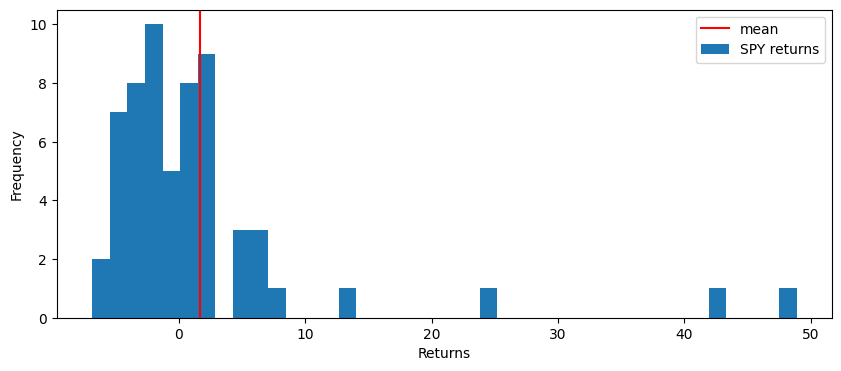

In [2203]:
import itertools
entry_price = 0
exit_price = 0
position = None
mean = SPY['rolling_vol'].mean()
returns = []
SPY.dropna(inplace = True)
for index, row in SPY.iterrows():
    if(row['rolling_vol']<=mean and position is None):
        entry_price = row['Open']
        position = 1
    elif row['rolling_vol']>=mean and position==1:
        exit_price = row['Close']
        gain = (exit_price-entry_price)/entry_price
        position = None
        returns.append(gain*100)


plt.figure(figsize = (10, 4))
plt.hist(returns, bins = 40, label = 'SPY returns')
plt.axvline(x = np.mean(returns), label = 'mean', color = 'red')
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.legend()
plt.show()

    